In [ ]:
# 한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (39.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 156210 files and di

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# matplotlib 설정하기
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
import plotly.express as px

#시각화 설정
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

import warnings
warnings.filterwarnings("ignore")

import os

In [ ]:
# 데이터 불러오기
case = pd.read_csv('/content/gdrive/MyDrive/DACON/코로나시각화/data/Case.csv')
patient = pd.read_csv('/content/gdrive/MyDrive/DACON/코로나시각화/data/PatientInfo.csv')
route = pd.read_csv('/content/gdrive/MyDrive/DACON/코로나시각화/data/PatientRoute.csv')
policy = pd.read_csv('/content/gdrive/MyDrive/DACON/코로나시각화/data/Policy.csv')
trend = pd.read_csv('/content/gdrive/MyDrive/DACON/코로나시각화/data/SearchTrend.csv')
seoul = pd.read_csv('/content/gdrive/MyDrive/DACON/코로나시각화/data/SeoulFloating.csv')
time = pd.read_csv('/content/gdrive/MyDrive/DACON/코로나시각화/data/Time.csv')
timeage = pd.read_csv('/content/gdrive/MyDrive/DACON/코로나시각화/data/TimeAge.csv')
timegender = pd.read_csv('/content/gdrive/MyDrive/DACON/코로나시각화/data/TimeGender.csv')
timeprov = pd.read_csv('/content/gdrive/MyDrive/DACON/코로나시각화/data/TimeProvince.csv')
weather = pd.read_csv('/content/gdrive/MyDrive/DACON/코로나시각화/data/Weather.csv')

In [ ]:
# PatientInfo 데이터
patient.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [ ]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3388 entries, 0 to 3387
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          3388 non-null   int64  
 1   global_num          2276 non-null   float64
 2   sex                 3311 non-null   object 
 3   birth_year          2927 non-null   float64
 4   age                 3304 non-null   object 
 5   country             3388 non-null   object 
 6   province            3388 non-null   object 
 7   city                3309 non-null   object 
 8   disease             18 non-null     object 
 9   infection_case      2620 non-null   object 
 10  infection_order     31 non-null     float64
 11  infected_by         822 non-null    float64
 12  contact_number      643 non-null    float64
 13  symptom_onset_date  481 non-null    object 
 14  confirmed_date      3385 non-null   object 
 15  released_date       1327 non-null   object 
 16  deceas

In [ ]:
patient['age'] = 2020-patient['birth_year']+1 # 나이 칼럼 추가

In [ ]:
released = patient.query('state == "released"')
isolated = patient.query('state == "isolated"')
deceased = patient.query('state == "deceased"')

In [ ]:
released.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,57.0,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,34.0,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,57.0,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,30.0,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,29.0,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [ ]:
released['sex'].value_counts() # 카테고리별 값 세기

female    1051
male       816
Name: sex, dtype: int64

In [ ]:
# data의 col별 값을 나타내는 pie chart
def pie_chart(data, col, title = ''):
    cnt_df = data[col].value_counts().reset_index()
    fig = px.pie(cnt_df, 
                 values = col, 
                 names = 'index', 
                 title = title, 
                 template = 'seaborn')
    fig.update_traces(pull=0.05, textinfo="value+percent")
    fig.show()

In [ ]:
# data의 col별 값을 나타내는 donut chart
def donut_chart(data, col, title = ''):
    plt.figure(figsize = (9,9))
    cnt_df = data[col].value_counts().reset_index()
    fig = px.pie(cnt_df, 
                 values = col, 
                 names = 'index', 
                 title = title, 
                 template = 'seaborn',
                 hole=0.8)
    fig.update_traces(pull=0.05, textinfo="value+percent")  # default : percent
    fig.show()

In [ ]:
# 성별에 따른 분포(격리해제/격리)
pie_chart(data = released, col = 'sex', title = '"Released" patient sex distribution')
donut_chart(data = isolated, col = 'sex', title = '"Isolated" patient sex distribution')

<Figure size 648x648 with 0 Axes>

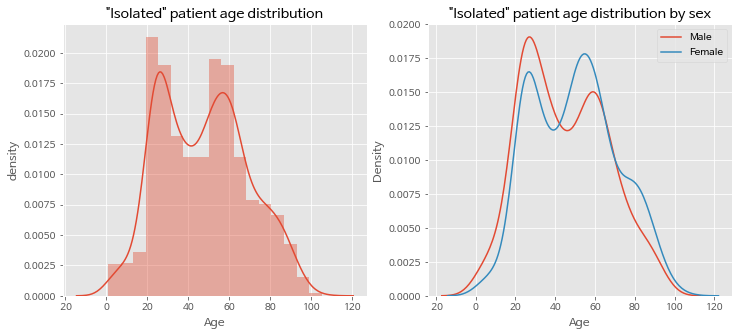

In [ ]:
# 나이에 따른 격리 환자
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12,5)

sns.distplot(isolated['age'].dropna(), ax = ax1) # distplot : kdeplot + histogram
ax1.set(title = '"Isolated" patient age distribution',xlabel = 'Age', ylabel = 'density')\

sns.kdeplot(isolated.query('sex == "male"')['age'].dropna(), label = 'Male', ax = ax2) # kdeplot : Kernel Density Estimator
sns.kdeplot(isolated.query('sex == "female"')['age'].dropna(), label = 'Female', ax = ax2)
ax2.set(title = '"Isolated" patient age distribution by sex',xlabel = 'Age')
plt.legend()
plt.show()

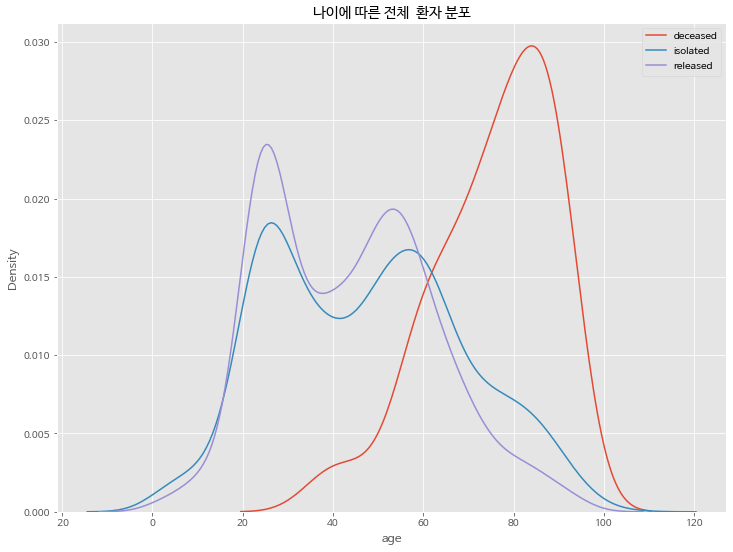

In [ ]:
# 전체 환자 분포 (격리해제/격리/사망)
plt.figure(figsize = (12,9))

sns.kdeplot(deceased['age'].dropna(), label='deceased')
sns.kdeplot(isolated['age'].dropna(), label='isolated')
sns.kdeplot(released['age'].dropna(), label='released')

plt.title('나이에 따른 전체  환자 분포')
plt.legend()
plt.show()

In [ ]:
patient.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,57.0,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,34.0,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,57.0,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,30.0,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,29.0,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [ ]:
patient.city.unique()

array(['Gangseo-gu', 'Jungnang-gu', 'Jongno-gu', 'Mapo-gu', 'Seongbuk-gu',
       'etc', 'Songpa-gu', 'Seodaemun-gu', 'Seongdong-gu', 'Seocho-gu',
       'Guro-gu', 'Gangdong-gu', 'Eunpyeong-gu', 'Geumcheon-gu',
       'Gwanak-gu', 'Nowon-gu', 'Dongjak-gu', 'Gangnam-gu',
       'Yangcheon-gu', 'Gwangjin-gu', 'Dongdaemun-gu', 'Yeongdeungpo-gu',
       'Dobong-gu', 'Yongsan-gu', 'Gangbuk-gu', 'Jung-gu', 'Dongnae-gu',
       'Haeundae-gu', 'Yeonje-gu', nan, 'Buk-gu', 'Nam-gu', 'Seo-gu',
       'Geumjeong-gu', 'Saha-gu', 'Suyeong-gu', 'Sasang-gu',
       'Busanjin-gu', 'Gijang-gun', 'Dong-gu', 'Dalseo-gu',
       'Dalseong-gun', 'Suseong-gu', 'Bupyeong-gu', 'Michuhol-gu',
       'Yeonsu-gu', 'Gyeyang-gu', 'Namdong-gu', 'Ganghwa-gun',
       'Yuseong-gu', 'Daedeok-gu', 'Ulju-gun', 'Sejong', 'Goyang-si',
       'Pyeongtaek-si', 'Bucheon-si', 'Suwon-si', 'Guri-si', 'Siheung-si',
       'Gimpo-si', 'Icheon-si', 'Pocheon-si', 'Anyang-si', 'Yongin-si',
       'Paju-si', 'Namyangju-si', 'Seongnam

In [ ]:
# country별 격리자
patient_city = patient.groupby(['city']).count().loc[:,['country']]
patient_city2 = patient_city.rename(columns={'country':'count'})
patient_city2

,count
city,
Andong-si,53
Ansan-si,16
Anseong-si,3
Anyang-si,22
Asan-si,10
...,...
Yeosu-si,3
Yongin-si,67
Yongsan-gu,18


In [ ]:
patient_city3 = patient_city2.reset_index()
patient_city3.columns

Index(['city', 'count'], dtype='object')

In [ ]:
patient_city4 = patient_city3.sort_values('count',ascending=False)[:15].reset_index()
patient_city4

,index,city,count
0,66,Gyeongsan-si,632
1,121,Seongnam-si,125
2,13,Cheonan-si,107
3,6,Bucheon-si,73
4,5,Bonghwa-gun,71
5,53,Gumi-si,68
6,150,Yongin-si,67
7,36,Gangnam-gu,64
8,153,etc,56
9,0,Andong-si,53


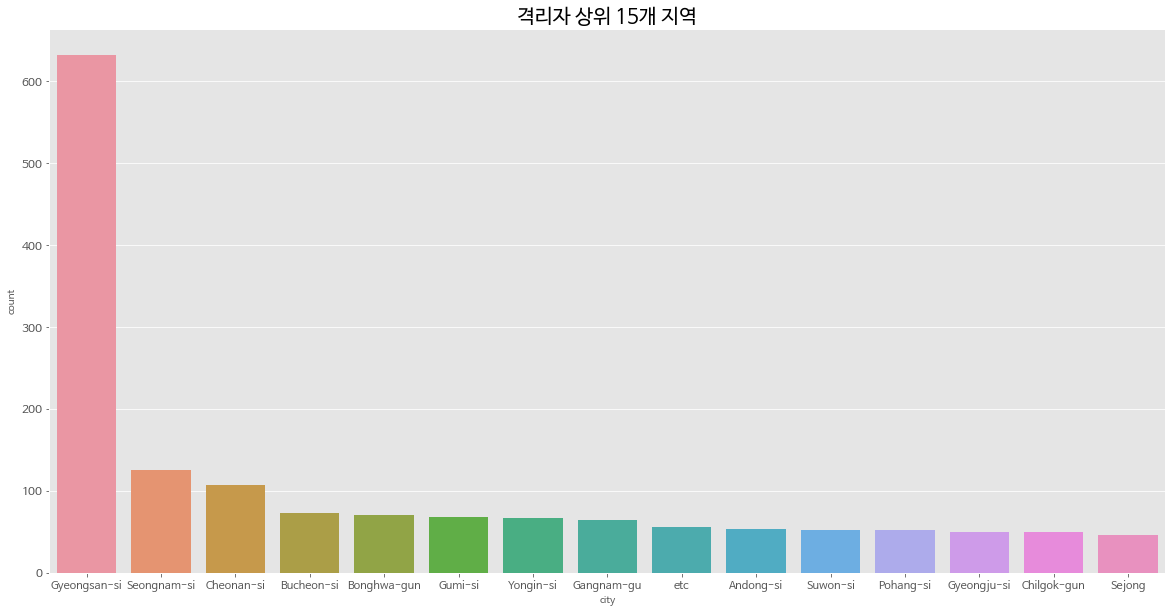

In [ ]:
plt.figure(figsize=(20,10))
plt.rc('font', size=20)
plt.rc('axes', labelsize=10)   
plt.rc('xtick', labelsize=12)  
plt.rc('ytick', labelsize=12)  
plt.xticks(rotation = 0,fontsize=11)
sns.barplot(data=patient_city4, x="city", y="count") 
plt.title("격리자 상위 15개 지역",fontsize=20)
plt.show()

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 22.9 MB/s 
     |████████████████████████████████| 16.7 MB 48.1 MB/s 
     |████████████████████████████████| 6.3 MB 43.6 MB/s 


In [ ]:
import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString
#import matplotlib.pyplot as plt
#import matplotlib
#import matplotlib.font_manager as fm

In [ ]:
###
region = pd.read_csv('/content/gdrive/MyDrive/DACON/코로나시각화/data/Region.csv')
region.head()

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080


In [ ]:
region.city.unique()

array(['Seoul', 'Gangnam-gu', 'Gangdong-gu', 'Gangbuk-gu', 'Gangseo-gu',
       'Gwanak-gu', 'Gwangjin-gu', 'Guro-gu', 'Geumcheon-gu', 'Nowon-gu',
       'Dobong-gu', 'Dongdaemun-gu', 'Dongjak-gu', 'Mapo-gu',
       'Seodaemun-gu', 'Seocho-gu', 'Seongdong-gu', 'Seongbuk-gu',
       'Songpa-gu', 'Yangcheon-gu', 'Yeongdeungpo-gu', 'Yongsan-gu',
       'Eunpyeong-gu', 'Jongno-gu', 'Jung-gu', 'Jungnang-gu', 'Busan',
       'Geumjeong-gu', 'Gijang-gun', 'Nam-gu', 'Dong-gu', 'Dongnae-gu',
       'Busanjin-gu', 'Buk-gu', 'Sasang-gu', 'Saha-gu', 'Seo-gu',
       'Suyeong-gu', 'Yeonje-gu', 'Yeongdo-gu', 'Haeundae-gu', 'Daegu',
       'Dalseo-gu', 'Dalseong-gun', 'Suseong-gu', 'Gwangju',
       'Gwangsan-gu', 'Incheon', 'Ganghwa-gun', 'Gyeyang-gu',
       'Michuhol-gu', 'Namdong-gu', 'Bupyeong-gu', 'Yeonsu-gu',
       'Ongjin-gun', 'Daejeon', 'Daedeok-gu', 'Yuseong-gu', 'Ulsan',
       'Ulju-gun', 'Sejong', 'Gyeonggi-do', 'Gapyeong-gun', 'Goyang-si',
       'Gwacheon-si', 'Gwangmyeong-si', 'Gwan

In [ ]:
region.province.unique()

array(['Seoul', 'Busan', 'Daegu', 'Gwangju', 'Incheon', 'Daejeon',
       'Ulsan', 'Sejong', 'Gyeonggi-do', 'Gangwon-do',
       'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do',
       'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do',
       'Korea'], dtype=object)

In [ ]:
# privince와 city가 같은 행 제거 (합계를 표현한 행)
idx_region_same = region[region.province == region.city].index
idx_region_same

Int64Index([0, 26, 43, 52, 58, 69, 75, 81, 82, 114, 133, 145, 161, 176, 199,
            223, 242, 243],
           dtype='int64')

In [ ]:
region.loc[[242]]

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
242,70000,Jeju-do,Jeju-do,33.488936,126.500423,113,123,4,1.53,15.1,6.4,1245


In [ ]:
region.drop(idx_region_same, inplace=True)
region

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080
5,10050,Seoul,Gwanak-gu,37.478290,126.951502,22,33,1,0.89,15.12,4.9,909
...,...,...,...,...,...,...,...,...,...,...,...,...
237,61140,Gyeongsangnam-do,Tongyeong-si,34.854426,128.433210,20,29,0,1.70,18.47,9.8,230
238,61150,Gyeongsangnam-do,Hadong-gun,35.067224,127.751271,16,15,0,0.84,32.89,19.1,94
239,61160,Gyeongsangnam-do,Haman-gun,35.272481,128.406540,16,20,0,1.19,23.74,14.7,94
240,61170,Gyeongsangnam-do,Hamyang-gun,35.520541,127.725177,13,12,0,1.01,32.65,20.9,83


In [ ]:
# 위도,경도 -> geometry
region['longitude'] = region['longitude'].astype(float)
region['latitude'] = region['latitude'].astype(float)

region['geometry'] = region.apply(lambda row : Point([row['longitude'], row['latitude']]), axis=1)
region = gpd.GeoDataFrame(region, geometry='geometry') # geodataframe으로
region.crs = {'init':'epsg:4326'}
region = region.to_crs({'init':'epsg:5179'}) # 좌표계 설정
region.head()

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count,geometry
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088,POINT (959988.644 1946666.283)
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023,POINT (966764.387 1947975.656)
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628,POINT (958137.888 1960157.457)
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080,POINT (942541.722 1950401.633)
5,10050,Seoul,Gwanak-gu,37.478290,126.951502,22,33,1,0.89,15.12,4.9,909,POINT (951503.994 1942259.005)


In [ ]:
# 행정동 경계 데이터
area = gpd.GeoDataFrame.from_file('/content/gdrive/MyDrive/DACON/코로나시각화/data/TL_SCCO_SIG.shp', encoding='euc-kr')
area

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,42110,Chuncheon-si,춘천시,"POLYGON ((1007462.095 2008948.792, 1007512.150..."
1,42130,Wonju-si,원주시,"POLYGON ((1038519.196 1944888.174, 1038552.691..."
2,42150,Gangneung-si,강릉시,"MULTIPOLYGON (((1136545.803 1962251.161, 11365..."
3,42170,Donghae-si,동해시,"MULTIPOLYGON (((1140184.975 1956251.627, 11401..."
4,42190,Taebaek-si,태백시,"POLYGON ((1133987.168 1927444.971, 1133980.895..."
...,...,...,...,...
245,43745,Jeungpyeong-gun,증평군,"POLYGON ((1003329.529 1867824.774, 1003386.941..."
246,43750,Jincheon-gun,진천군,"POLYGON ((994785.370 1890378.710, 994834.270 1..."
247,43760,Goesan-gun,괴산군,"POLYGON ((1026770.639 1883281.549, 1026781.261..."
248,43770,Eumseong-gun,음성군,"POLYGON ((1011533.109 1906176.344, 1011531.998..."


In [ ]:
area = area.to_crs({'init':'epsg:5179'})

In [ ]:
#!pip uninstall rtree
!sudo apt install libspatialindex-dev
!pip install rtree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 555 kB of archives.
After this operation, 3,308 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-dev amd64 1.8.5-5 [285 kB]
Fetched 555 kB in 0s (4,406 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialo

In [ ]:
# 공간결합
gdf_joined = gpd.sjoin(area,region, how='left',op="intersects")  # polygon(N):point(1)
gdf_joined

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry,index_right,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,42110,Chuncheon-si,춘천시,"POLYGON ((1007462.095 2008948.792, 1007512.150...",127.0,30130.0,Gangwon-do,Chuncheon-si,37.881281,127.730088,40.0,43.0,5.0,1.50,17.10,7.6,472.0
1,42130,Wonju-si,원주시,"POLYGON ((1038519.196 1944888.174, 1038552.691...",123.0,30090.0,Gangwon-do,Wonju-si,37.341963,127.919668,50.0,71.0,4.0,1.71,14.46,6.7,597.0
2,42150,Gangneung-si,강릉시,"MULTIPOLYGON (((1136545.803 1962251.161, 11365...",115.0,30010.0,Gangwon-do,Gangneung-si,37.751970,128.875928,34.0,36.0,4.0,1.90,20.46,9.6,347.0
3,42170,Donghae-si,동해시,"MULTIPOLYGON (((1140184.975 1956251.627, 11401...",117.0,30030.0,Gangwon-do,Donghae-si,37.524689,129.114239,14.0,17.0,0.0,1.60,19.41,10.1,140.0
4,42190,Taebaek-si,태백시,"POLYGON ((1133987.168 1927444.971, 1133980.895...",128.0,30140.0,Gangwon-do,Taebaek-si,37.164060,128.985736,12.0,12.0,1.0,1.16,23.88,12.8,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,43745,Jeungpyeong-gun,증평군,"POLYGON ((1003329.529 1867824.774, 1003386.941...",141.0,40080.0,Chungcheongbuk-do,Jeungpyeong-gun,36.785301,127.581481,4.0,5.0,0.0,1.39,16.59,8.7,62.0
246,43750,Jincheon-gun,진천군,"POLYGON ((994785.370 1890378.710, 994834.270 1...",142.0,40090.0,Chungcheongbuk-do,Jincheon-gun,36.855374,127.435635,15.0,16.0,0.0,1.15,16.16,8.3,121.0
247,43760,Goesan-gun,괴산군,"POLYGON ((1026770.639 1883281.549, 1026781.261...",134.0,40010.0,Chungcheongbuk-do,Goesan-gun,36.815340,127.786651,14.0,15.0,1.0,0.36,33.01,16.5,64.0
248,43770,Eumseong-gun,음성군,"POLYGON ((1011533.109 1906176.344, 1011531.998...",139.0,40060.0,Chungcheongbuk-do,Eumseong-gun,36.940237,127.690502,21.0,24.0,2.0,0.88,20.33,9.2,169.0


In [ ]:
gdf_joined.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 251 entries, 0 to 249
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   SIG_CD                    251 non-null    object  
 1   SIG_ENG_NM                251 non-null    object  
 2   SIG_KOR_NM                251 non-null    object  
 3   geometry                  251 non-null    geometry
 4   index_right               226 non-null    float64 
 5   code                      226 non-null    float64 
 6   province                  226 non-null    object  
 7   city                      226 non-null    object  
 8   latitude                  226 non-null    float64 
 9   longitude                 226 non-null    float64 
 10  elementary_school_count   226 non-null    float64 
 11  kindergarten_count        226 non-null    float64 
 12  university_count          226 non-null    float64 
 13  academy_ratio             226 non-null    

In [ ]:
gdf_joined.geometry.boundary

0      LINESTRING (1007462.095 2008948.792, 1007512.1...
1      LINESTRING (1038519.196 1944888.174, 1038552.6...
2      MULTILINESTRING ((1136545.803 1962251.161, 113...
3      MULTILINESTRING ((1140184.975 1956251.627, 114...
4      LINESTRING (1133987.168 1927444.971, 1133980.8...
                             ...                        
245    LINESTRING (1003329.529 1867824.774, 1003386.9...
246    MULTILINESTRING ((994785.370 1890378.710, 9948...
247    LINESTRING (1026770.639 1883281.549, 1026781.2...
248    LINESTRING (1011533.109 1906176.344, 1011531.9...
249    LINESTRING (1074485.607 1906892.467, 1074493.3...
Length: 251, dtype: geometry

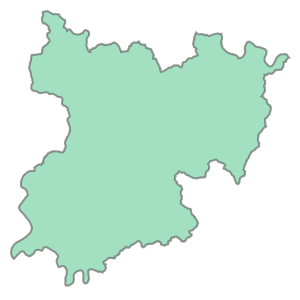

In [ ]:
gdf_joined.geometry[0]

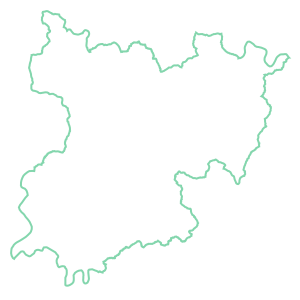

In [ ]:
gdf_joined.geometry.boundary[0]